In [2]:
#preprosess step

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler



# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



#load the data set

df=pd.read_csv(r'C:\Users\nh013\Desktop\tomato.csv\Tomato.csv')

#feature selection

df=df[['Date','Unit','Minimum','Maximum','Average','Market']]

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# fill NaN values in Unit column with '0'
df['Unit'] = df['Unit'].fillna('0')

#identify missing data

print(df.isnull().sum())

#drop rows with missing values

df.dropna(inplace=True)

# fill missing value with mean or median

mean=df.mean()
df.fillna(mean, inplace=True)

#fill missing vlues with mode

mode=df.mode().iloc[0]
df.fillna(mode, inplace=True)

#fill missing values with forward fill

df.fillna(method='ffill', inplace=True)

#fill missing values with backward fill

df.fillna(method='bfill', inplace=True)

# Convert 'Unit' column to numerical format (assuming all values are in kg)
df['Unit'] = pd.to_numeric(df['Unit'].str.replace('Kg', '').str.replace(',', ''))


# Handle outliers
df = handle_outliers(df, 'Average')

# One-hot encode categorical variable 'Market'
df = pd.get_dummies(df, columns=['Market'])


#remove dublicates rows

df.drop_duplicates(inplace=True)

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# fill NaN values in Unit column with '0'
df['Unit'] = df['Unit'].fillna('0')


print(df)
# Explore the data
print(df.head())  # print first few rows of the dataset
print(df.shape)  # print the shape of the dataset
print(df.info())  # print the information about the dataset
# Check the correlation between the features
print(df.corr())



Date       0
Unit       0
Minimum    0
Maximum    0
Average    0
Market     0
dtype: int64
            Date Unit   Minimum   Maximum   Average  Market_Tomato
0     2013-06-16    0 -0.534570 -0.521438 -0.529102            0.0
1     2013-06-17    0 -0.921977 -0.953164 -0.940146            0.0
2     2013-06-18    0 -0.792841 -0.891489 -0.845290            0.0
3     2013-06-19    0 -0.663706 -0.768138 -0.718815            0.0
4     2013-06-20    0 -0.792841 -0.891489 -0.845290            0.0
...          ...  ...       ...       ...       ...            ...
2736  2021-05-09    0 -1.567655 -1.569916 -1.572522            0.0
2737  2021-05-10    0 -1.567655 -1.569916 -1.572522            0.0
2738  2021-05-11    0 -1.567655 -1.569916 -1.572522            0.0
2739  2021-05-12    0 -0.276299 -0.336412 -0.307770            0.0
2740  2021-05-13    0  0.046541 -0.028036  0.008418            0.0

[2697 rows x 6 columns]
         Date Unit   Minimum   Maximum   Average  Market_Tomato
0  2013-06-16   

C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\70081787.py:44: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2697 non-null   object 
 1   Unit           2697 non-null   object 
 2   Minimum        2697 non-null   float64
 3   Maximum        2697 non-null   float64
 4   Average        2697 non-null   float64
 5   Market_Tomato  2697 non-null   float64
dtypes: float64(4), object(2)
memory usage: 147.5+ KB
None
                Minimum   Maximum   Average  Market_Tomato
Minimum        1.000000  0.990567  0.997529            NaN
Maximum        0.990567  1.000000  0.997746            NaN
Average        0.997529  0.997746  1.000000            NaN
Market_Tomato       NaN       NaN       NaN            NaN


Date       0
Unit       0
Minimum    0
Maximum    0
Average    0
Market     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\3684075870.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\skl

The average price is: 9.933012472936533e-17
         Date Unit   Minimum   Maximum   Average  Market_Tomato  Average_Lag1
1  2013-06-17    0 -0.921977 -0.953164 -0.940146            0.0     -0.529102
2  2013-06-18    0 -0.792841 -0.891489 -0.845290            0.0     -0.940146
3  2013-06-19    0 -0.663706 -0.768138 -0.718815            0.0     -0.845290
4  2013-06-20    0 -0.792841 -0.891489 -0.845290            0.0     -0.718815
5  2013-06-21    0 -1.244816 -1.261540 -1.256334            0.0     -0.845290
(2696, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2696 entries, 1 to 2740
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2696 non-null   object 
 1   Unit           2696 non-null   object 
 2   Minimum        2696 non-null   float64
 3   Maximum        2696 non-null   float64
 4   Average        2696 non-null   float64
 5   Market_Tomato  2696 non-null   float64
 6   Average_Lag1   

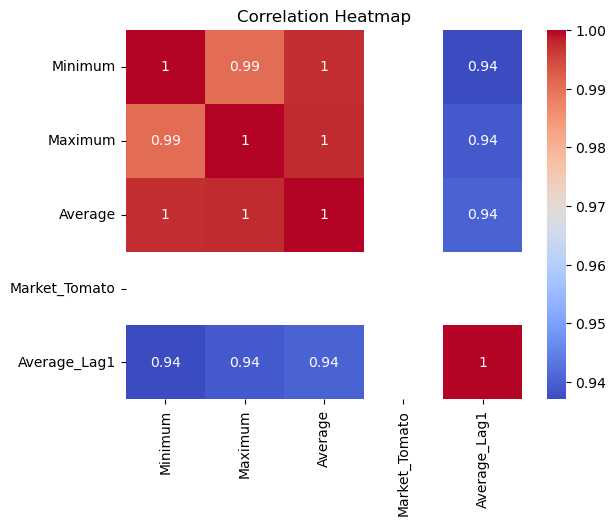

In [4]:
# perform feature engineering
# using lag feature .

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Function to calculate average price
def calculate_average_price(prices):
    total = sum(prices)
    average_price = total / len(prices)
    return average_price

# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\tomato.csv\Tomato.csv')

# Feature selection
df = df[['Date', 'Unit', 'Minimum','Maximum', 'Average', 'Market']]

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# Identify missing data
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)

# Convert 'Unit' column to numerical format (assuming all values are in kg)
df['Unit'] = pd.to_numeric(df['Unit'].str.replace('Kg', '').str.replace(',', ''))

# Handle outliers
df = handle_outliers(df, 'Average')

# One-hot encode categorical variable 'Market'
df = pd.get_dummies(df, columns=['Market'])




# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Standardize all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# Fill NaN values in Unit column with '0'
df['Unit'] = df['Unit'].fillna('0')

# Calculate average price of 'Average' column
average_price = calculate_average_price(df['Average'])
print("The average price is:", average_price)

# Add a lag feature to the 'Average' column with a lag of 1
df['Average_Lag1'] = df['Average'].shift(1)

# Drop the first row, which will have NaN values due to the shift
df.dropna(inplace=True)


# Explore the data
print(df.head())  # print first few rows of the dataset
print(df.shape)  # print the shape of the dataset
print(df.info())  # print the information about the dataset
# Check the correlation between the features
print(df.corr())

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()



Date       0
Unit       0
Minimum    0
Maximum    0
Average    0
Market     0
dtype: int64
The average price is: 9.933012472936533e-17
            Date Unit   Minimum   Maximum   Average  Market_Tomato  \
29    2013-07-24    0 -0.147163 -0.274737 -0.212914            0.0   
30    2013-07-25    0  0.369380  0.280340  0.324606            0.0   
31    2013-07-26    0  0.369380  0.280340  0.324606            0.0   
32    2013-07-28    0  0.369380  0.280340  0.324606            0.0   
33    2013-07-29    0  0.498515  0.342015  0.419462            0.0   
...          ...  ...       ...       ...       ...            ...   
2736  2021-05-09    0 -1.567655 -1.569916 -1.572522            0.0   
2737  2021-05-10    0 -1.567655 -1.569916 -1.572522            0.0   
2738  2021-05-11    0 -1.567655 -1.569916 -1.572522            0.0   
2739  2021-05-12    0 -0.276299 -0.336412 -0.307770            0.0   
2740  2021-05-13    0  0.046541 -0.028036  0.008418            0.0   

      Average_rolling_me

C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\2949135086.py:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklea

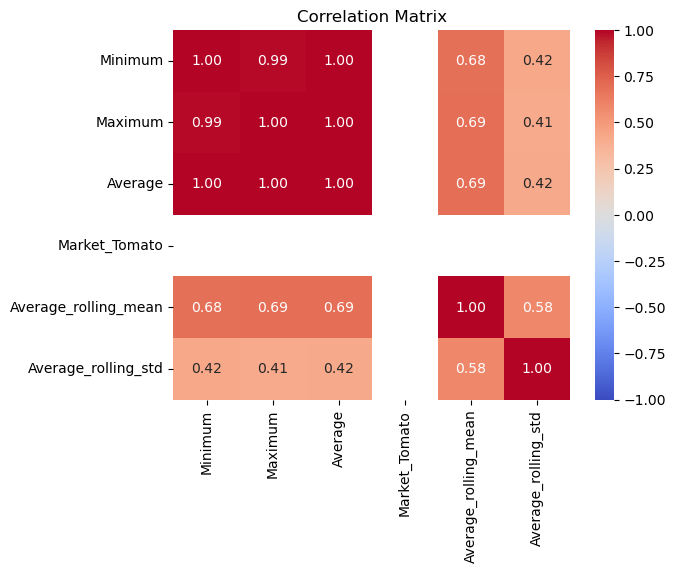

In [5]:
# using rooling statistics feature

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



#load the data set

df=pd.read_csv(r'C:\Users\nh013\Desktop\tomato.csv\Tomato.csv')

#feature selection

df=df[['Date','Unit','Minimum','Maximum','Average','Market']]

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# fill NaN values in Unit column with '0'
df['Unit'] = df['Unit'].fillna('0')

#identify missing data

print(df.isnull().sum())

#drop rows with missing values

df.dropna(inplace=True)

# fill missing value with mean or median

mean=df.mean()
df.fillna(mean, inplace=True)

#fill missing vlues with mode

mode=df.mode().iloc[0]
df.fillna(mode, inplace=True)

#fill missing values with forward fill

df.fillna(method='ffill', inplace=True)

#fill missing values with backward fill

df.fillna(method='bfill', inplace=True)

# Convert 'Unit' column to numerical format (assuming all values are in kg)
df['Unit'] = pd.to_numeric(df['Unit'].str.replace('Kg', '').str.replace(',', ''))


# Handle outliers
df = handle_outliers(df, 'Average')

# One-hot encode categorical variable 'Market'
df = pd.get_dummies(df, columns=['Market'])


#remove dublicates rows

df.drop_duplicates(inplace=True)

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# fill NaN values in Unit column with '0'
df['Unit'] = df['Unit'].fillna('0')

# Calculate rolling mean and standard deviation for 'Average' column
df['Average_rolling_mean'] = df['Average'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Average'].rolling(window=30).std()

# Drop rows with NaN values after calculating rolling mean and std
df.dropna(inplace=True)


print("The average price is:", average_price)
print(df)
# Explore the data
print(df.head())  # print first few rows of the dataset
print(df.shape)  # print the shape of the dataset
print(df.info())  # print the information about the dataset
# Check the correlation between the features
print(df.corr())


# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap with annotations and a colorbar
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', center=0, vmin=-1, vmax=1, cbar=True)

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the plot
plt.show()


Date       0
Unit       0
Minimum    0
Maximum    0
Average    0
Market     0
dtype: int64
The average price is: 9.933012472936533e-17
           Date Unit   Minimum   Maximum   Average  Market_Tomato  Year  \
0    2013-06-16    0 -0.534570 -0.521438 -0.529102            0.0  2013   
1    2013-06-17    0 -0.921977 -0.953164 -0.940146            0.0  2013   
2    2013-06-18    0 -0.792841 -0.891489 -0.845290            0.0  2013   
3    2013-06-19    0 -0.663706 -0.768138 -0.718815            0.0  2013   
4    2013-06-20    0 -0.792841 -0.891489 -0.845290            0.0  2013   
...         ...  ...       ...       ...       ...            ...   ...   
2736 2021-05-09    0 -1.567655 -1.569916 -1.572522            0.0  2021   
2737 2021-05-10    0 -1.567655 -1.569916 -1.572522            0.0  2021   
2738 2021-05-11    0 -1.567655 -1.569916 -1.572522            0.0  2021   
2739 2021-05-12    0 -0.276299 -0.336412 -0.307770            0.0  2021   
2740 2021-05-13    0  0.046541 -0.028036

C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\4203133598.py:46: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklea

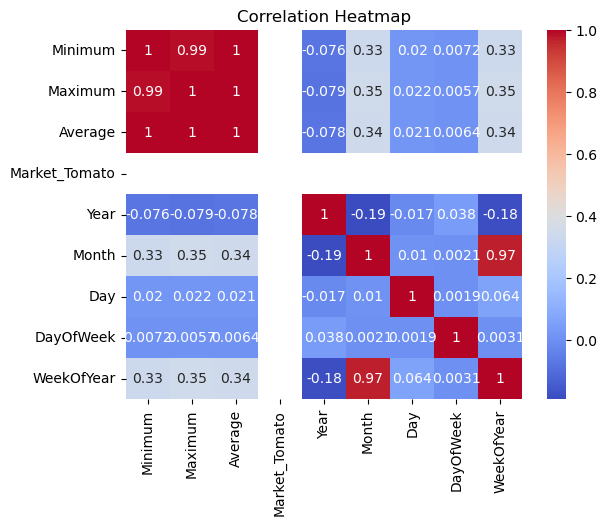

In [6]:
# useing time based feature engineering

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt


# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



#load the data set

df=pd.read_csv(r'C:\Users\nh013\Desktop\tomato.csv\Tomato.csv')

#feature selection

df=df[['Date','Unit','Minimum','Maximum','Average','Market']]

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# fill NaN values in Unit column with '0'
df['Unit'] = df['Unit'].fillna('0')

#identify missing data

print(df.isnull().sum())

#drop rows with missing values

df.dropna(inplace=True)

# fill missing value with mean or median

mean=df.mean()
df.fillna(mean, inplace=True)

#fill missing vlues with mode

mode=df.mode().iloc[0]
df.fillna(mode, inplace=True)

#fill missing values with forward fill

df.fillna(method='ffill', inplace=True)

#fill missing values with backward fill

df.fillna(method='bfill', inplace=True)

# Convert 'Unit' column to numerical format (assuming all values are in kg)
df['Unit'] = pd.to_numeric(df['Unit'].str.replace('Kg', '').str.replace(',', ''))


# Handle outliers
df = handle_outliers(df, 'Average')

# One-hot encode categorical variable 'Market'
df = pd.get_dummies(df, columns=['Market'])


#remove dublicates rows

df.drop_duplicates(inplace=True)

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Replace 'Unknown' values with NaN values in 'Unit' column
df['Unit'] = df['Unit'].replace('Unknown', 0)

# fill NaN values in Unit column with '0'
df['Unit'] = df['Unit'].fillna('0')


#using time based featuring
# Convert the datetime column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.weekofyear


print("The average price is:", average_price)
print(df)
# Explore the data
print(df.head())  # print first few rows of the dataset
print(df.shape)  # print the shape of the dataset
print(df.info())  # print the information about the dataset
# Check the correlation between the features
print(df.corr())

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add title and display the plot
plt.title('Correlation Heatmap')
plt.show()